## Cuadrados mínimos lineal - modelo cuadrático

<ol>
<li>Modelo lineal</li>
<li>Modelo cuadrático</li>
<li>Reparametrización</li>
</ol>

In [1]:
import math
import numpy as np
import pandas as pd
from numpy.linalg import inv
import matplotlib.pyplot as plt
from scipy.stats import chi2
import sda

### Datos

In [2]:
input_file = 'beta.dat'
data = pd.read_csv(input_file)
data

,x,beta,dbeta
0,1.02,2.24327,0.008319
1,1.06,2.21686,0.007972
2,1.10,2.20075,0.009987
3,1.14,2.17497,0.009385
4,1.18,2.13199,0.010520
5,1.22,2.11644,0.015872
6,1.26,2.08321,0.018500
7,1.30,2.01585,0.020952
8,1.34,2.00369,0.016701


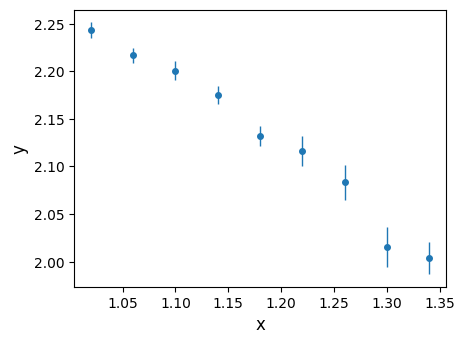

In [3]:
fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.errorbar(data["x"], data["beta"], data["dbeta"],ls='none', marker='o', label="Datos")
plt.show()

### Matriz del modelo

In [4]:
def model_matrix(x):
    # return np.column_stack([x**0, x])  # modelo lineal
    return np.column_stack([x**0, x**1, x**2])  # modelo cuadrático
    # return np.column_stack([x**0, (x-1.2)**1, (x-1.2)**2]) # modelo cuadrático reparametrizado

In [5]:
A = model_matrix(data["x"])
A

array([[1.    , 1.02  , 1.0404],
       [1.    , 1.06  , 1.1236],
       [1.    , 1.1   , 1.21  ],
       [1.    , 1.14  , 1.2996],
       [1.    , 1.18  , 1.3924],
       [1.    , 1.22  , 1.4884],
       [1.    , 1.26  , 1.5876],
       [1.    , 1.3   , 1.69  ],
       [1.    , 1.34  , 1.7956]])

### Ajuste

In [6]:
res = sda.linear_least_squares(A, data["beta"], data["dbeta"])
res

{'est': array([ 1.89354509,  1.18353602, -0.8253585 ]),
 'errors': array([0.55782534, 0.96657847, 0.41649271]),
 'cova': array([[ 0.31116911, -0.53872862,  0.23152104],
        [-0.53872862,  0.93427394, -0.4022051 ],
        [ 0.23152104, -0.4022051 ,  0.17346618]]),
 'corr': array([[ 1.        , -0.9991592 ,  0.99651722],
        [-0.9991592 ,  1.        , -0.99908639],
        [ 0.99651722, -0.99908639,  1.        ]]),
 'chi2_min': 3.025813328271747,
 'ndof': 6,
 'pvalue': 0.8056000818372332}

In [7]:
estimadores = res['est']
print(f'Estimadores: {estimadores}')

Estimadores: [ 1.89354509  1.18353602 -0.8253585 ]


In [8]:
errores = res['errors']
print(f'Errores: {errores}')

Errores: [0.55782534 0.96657847 0.41649271]


In [9]:
cova = res['cova']
print(f'Covarianza parámetros: {cova}')

Covarianza parámetros: [[ 0.31116911 -0.53872862  0.23152104]
 [-0.53872862  0.93427394 -0.4022051 ]
 [ 0.23152104 -0.4022051   0.17346618]]


In [10]:
corr = res['corr']
print(f'Correlación parámetros: {corr}')

Correlación parámetros: [[ 1.         -0.9991592   0.99651722]
 [-0.9991592   1.         -0.99908639]
 [ 0.99651722 -0.99908639  1.        ]]


### Graficar

In [12]:
xmin=1
xmax=1.35
x = np.linspace( xmin, xmax, 100)
A1 = model_matrix(x)
mu_est = A1 @ estimadores
sigma_mu_est = sda.fit_errors(A1, cova)

NameError: name 'xdata' is not defined

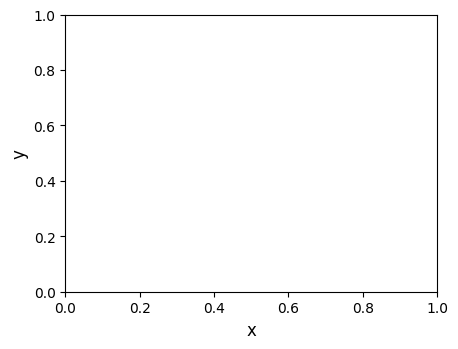

In [13]:
fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.errorbar(data["x"], data["beta"], data["dbeta"],ls='none', marker='o', label="Datos")
ax.plot(x, mu_est, ls='--', label='Ajuste')
ax.fill_between(x, mu_est-sigma_mu_est, mu_est+sigma_mu_est, color='tab:orange', alpha=0.2)
ax.legend()
plt.show()